<a href="https://colab.research.google.com/github/yutongwu77/demo/blob/main/unit03_mult_lin_reg/linreg_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression In-class Exercise

Before starting the lab, the following exercise will perform a simple multiple variable linear fitting on a civil engineering dataset.  In doing this exercise, you will learn to:

* Load data from a `csv` file using the `pandas` package
* Visualize relations between different variables with a scatter plot.
* Fit a multiple variable linear model using the `sklearn` package
* Evaluate the fit.

We begin by loading the packages we will need.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

## Download Data

Concrete is one of the most basic construction materials.  In this exercise, you will download a simple dataset for predicting the strength of concrete from the attributes of concrete.  The data set comes from this very nice
[kaggle competition](https://www.kaggle.com/maajdl/yeh-concret-data).  Kaggle has many excellent dataset for your project.  
You can download the data with the following command.  After running this command, you should have the file `data.csv` in your local folder.

In [3]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/Concrete_Data_Yeh.csv'
fn_dst = 'data.csv'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File data.csv downloaded


The `pandas` package has excellent methods for loading `csv` files.  YThe following command loads the `csv` file into a dataframe `df`.

In [4]:
df = pd.read_csv('data.csv')

Ues the `df.head()` to print the first few rows of the dataframe.

In [5]:
# TODO

In [6]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In this exercise, the target variable will be the concrete strength in Megapascals, `csMPa`.  We will use the other 8 attributes as predictors to predict the strength.  

Create a list called `xnames` of the 8 names of the predictors.  You can do this as follows:
* Get the list of names of the columns from `df.columns.tolist()`.  
* Remove the last items from the list using indexing.

Print the `xnames`.

In [7]:
s1 = pd.Series([1,2],index=['a','b'])
s1


,0
a,1
b,2


In [ ]:
# TODO
#   xnames = ...

In [8]:
# TODO
xnames = df.columns.tolist()[:-1]  # 获取除最后一列外的所有列名
print(xnames)

['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']


Get the data matrix `X` and target vector `y` from the dataframe `df`.  

Recall that to get the items from a dataframe, you can use syntax such as

    s = np.array(df['slag'])  
        
which gets the data in the column `slag` and puts it into an array `s`.  You can also get multiple columns with syntax like

    X12 = np.array(df['cement', 'slag'])  


In [ ]:
# TODO
#    X = ...
#    y = ...

In [9]:
# TODO
X = np.array(df[xnames])  # 获取所有预测变量
y = np.array(df['csMPa'])  # 获取目标变量（混凝土强度）

Using the subplot command, create two plots, side-by-side with:
* `y` vs. the `cement` on the left (attribute 0)
* `y` vs. the `water` on the right (attribute 3)
Label the axes and use the `plt.tight_layout()` to adjust the plots nicely at the end.

In [ ]:
# TODO

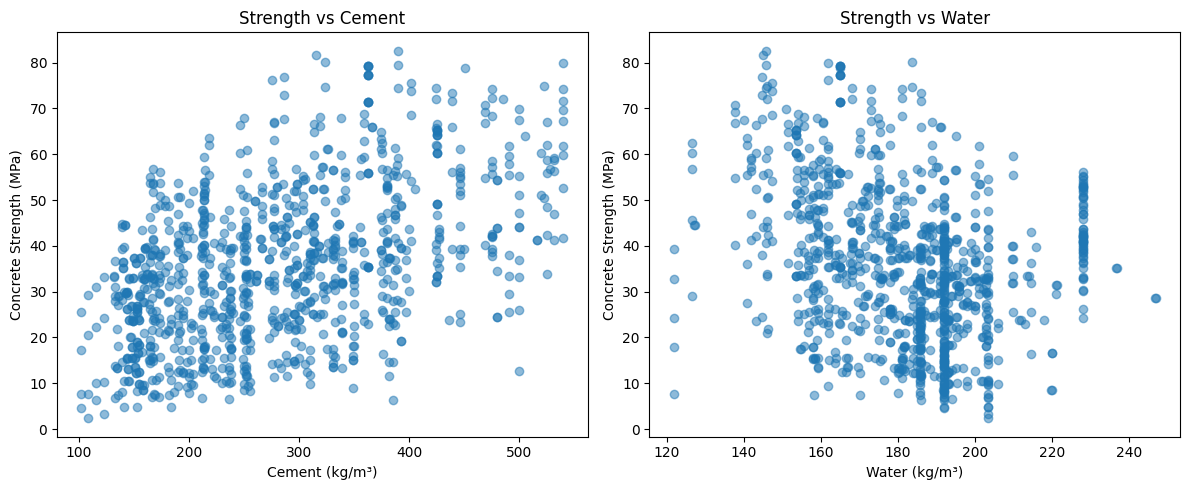

In [10]:
# TODO
plt.figure(figsize=(12, 5))

# 左图：水泥vs强度
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y, alpha=0.5)
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Concrete Strength (MPa)')
plt.title('Strength vs Cement')

# 右图：水vs强度
plt.subplot(1, 2, 2)
plt.scatter(X[:, 3], y, alpha=0.5)
plt.xlabel('Water (kg/m³)')
plt.ylabel('Concrete Strength (MPa)')
plt.title('Strength vs Water')

plt.tight_layout()
plt.show()

## Split the Data into Training and Test

Split the data into training and test.  Use 30% for test and 70% for training.  You can do the splitting manually or use the `sklearn` package `train_test_split`.   Store the training data in `Xtr,ytr` and test data in `Xts,yts`.


In [12]:
from sklearn.model_selection import train_test_split

# TODO
#  Xtr,Xts,ytr,yts = train_test_split(...)

In [13]:
# TODO
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=42)

## Fit a Linear Model

Create a linear regression model object `reg` and fit the model on the training data.


In [ ]:
# TODO
#   reg = ...
#   reg.fit(...)

In [14]:
# TODO
reg = linear_model.LinearRegression()
reg.fit(Xtr, ytr)

LinearRegression()

Compute the predicted values `yhat_tr` on the training data and print the `R^2` value on the training data.

In [ ]:
# TODO
#    yhat_tr = ...
#    rsq_tr = ...

In [15]:
# TODO
yhat_tr = reg.predict(Xtr)
rsq_tr = reg.score(Xtr, ytr)
print(f'Training R² score: {rsq_tr:.4f}')

Training R² score: 0.6197


Now compute the predicted values `yhat_ts` on the test data and print the `R^2` value on the test data.

In [16]:
# TODO
#    yhat_ts = ...
#    rsq_ts = ...

In [17]:
# TODO
yhat_ts = reg.predict(Xts)
rsq_ts = reg.score(Xts, yts)
print(f'Test R² score: {rsq_ts:.4f}')

Test R² score: 0.5944


Create a scatter plot of the actual vs. predicted values of `y` on the test data.

In [ ]:
# TODO

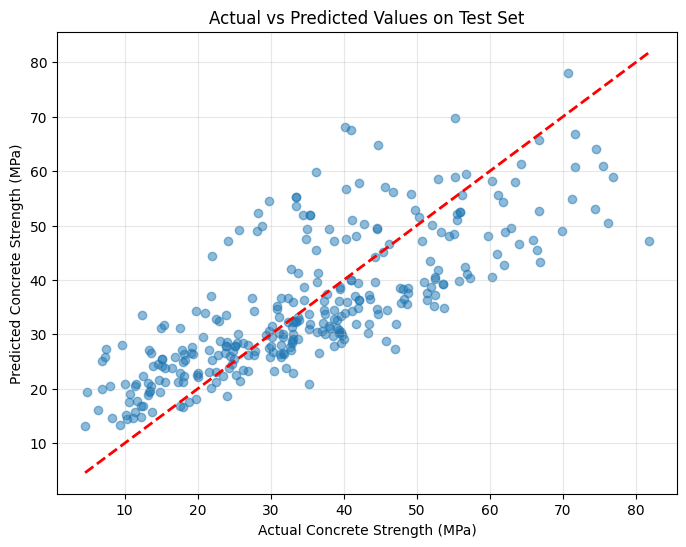

In [18]:
# TODO
plt.figure(figsize=(8, 6))
plt.scatter(yts, yhat_ts, alpha=0.5)
plt.plot([yts.min(), yts.max()], [yts.min(), yts.max()], 'r--', lw=2)
plt.xlabel('Actual Concrete Strength (MPa)')
plt.ylabel('Predicted Concrete Strength (MPa)')
plt.title('Actual vs Predicted Values on Test Set')
plt.grid(True, alpha=0.3)
plt.show()

## Evaluating Different Variables

One way to see the importance of different variables is to compute the *normalized* coefficients:

    coeff_norm[j]  = reg.coef_[j] * std(Xtr[:,j]) / std(ytr)
    
which represents the change in the target for a change of one standard deviation in the attribute `j`.  The change in the target is normalized by its standard deviation.  

Compute the `coeff_norm` for the 8 attributes and plot the values using a `plt.stem()` plot.

In [ ]:
# TODO
#  coeff_norm = ...

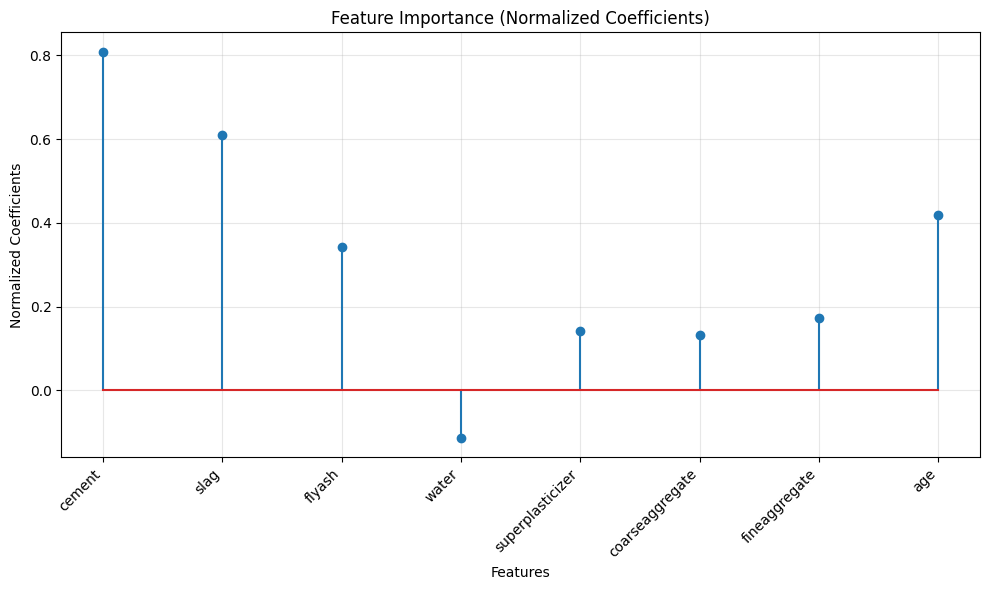

Most influential variable: cement with normalized coefficient: 0.8091


In [19]:
# TODO
# 计算标准化系数
coeff_norm = np.zeros(len(xnames))
for j in range(len(xnames)):
    coeff_norm[j] = reg.coef_[j] * np.std(Xtr[:, j]) / np.std(ytr)

# 绘制stem图
plt.figure(figsize=(10, 6))
plt.stem(range(len(xnames)), coeff_norm)
plt.xticks(range(len(xnames)), xnames, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Normalized Coefficients')
plt.title('Feature Importance (Normalized Coefficients)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 找出最重要的变量
max_idx = np.argmax(np.abs(coeff_norm))
print(f'Most influential variable: {xnames[max_idx]} with normalized coefficient: {coeff_norm[max_idx]:.4f}')

Which variable has the highest normalized coefficient, and hence most influence on the concrete strength?

In [ ]:
# TODO